In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# TASK 1

In [105]:
df = pd.read_csv(r'C:\Users\USER\Desktop\jumia_jitters_dataset.csv')
df


,Order ID,Order Date,Dispatch Date,Delivery Date,Seller ID,Product Category,Price,Quantity,Warehouse Zone,Customer Rating,Review Text,Sentiment Score,Return Flag,Complaint Code,Delivery Method,Customer Region
0,O00000,5/28/2025,5/30/2025,6/6/2025,S033,Fashion,193.52,1.0,Kano,4.0,Packaging could be better but the item works f...,0.458333,No,No Complaint,Express,North Central
1,O00001,6/24/2025,6/26/2025,7/3/2025,S018,Groceries,86.45,3.0,Lagos,3.0,Packaging could be better but the item works f...,0.458333,No,No Complaint,Standard,Volta
2,O00002,NaN,6/6/2025,6/7/2025,S036,Home & Living,80.00,3.0,Kumasi,4.0,"It's okay, not too bad but not amazing either.",-0.166667,No,No Complaint,Standard,Ashanti
3,O00003,NaN,6/24/2025,6/28/2025,S001,Health,469.89,2.0,Kano,4.0,Excellent quality and affordable price. Highly...,0.580000,No,No Complaint,Pickup,North Central
4,O00004,NaN,4/14/2025,4/22/2025,S024,Groceries,309.71,1.0,Accra,3.0,Item arrived in perfect condition and works well.,1.000000,No,No Complaint,Standard,Greater Accra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,O00995,6/12/2025,6/14/2025,6/17/2025,S030,Groceries,NaN,4.0,Accra,4.0,Fake product and horrible packaging.,-0.750000,No,No Complaint,Pickup,Volta
996,O00996,5/1/2025,5/2/2025,5/8/2025,S007,Health,266.60,2.0,Kumasi,4.0,"Fast delivery, item exactly as described. Very...",0.420833,No,No Complaint,Pickup,North Central
997,O00997,6/25/2025,6/27/2025,6/28/2025,S015,Toys,108.38,2.0,Accra,4.0,"Delivery was average, product as expected.",-0.125000,No,No Complaint,Standard,Volta
998,O00998,6/18/2025,6/19/2025,6/23/2025,S028,Home & Living,416.04,2.0,Accra,2.0,"Just received it, will see how it performs ove...",0.000000,No,No Complaint,Pickup,Greater Accra


In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          1000 non-null   object 
 1   Order Date        993 non-null    object 
 2   Dispatch Date     996 non-null    object 
 3   Delivery Date     998 non-null    object 
 4   Seller ID         1000 non-null   object 
 5   Product Category  989 non-null    object 
 6   Price             974 non-null    float64
 7   Quantity          991 non-null    float64
 8   Warehouse Zone    981 non-null    object 
 9   Customer Rating   997 non-null    float64
 10  Review Text       967 non-null    object 
 11  Sentiment Score   994 non-null    float64
 12  Return Flag       1000 non-null   object 
 13  Complaint Code    988 non-null    object 
 14  Delivery Method   1000 non-null   object 
 15  Customer Region   1000 non-null   object 
dtypes: float64(4), object(12)
memory usage: 125

In [137]:
df.shape


(1000, 16)

In [138]:
df.describe()


,Price,Quantity,Customer Rating,Sentiment Score
count,974.000000,991.000000,997.000000,994.000000
mean,256.466735,2.524723,3.442327,0.090091
std,137.696415,1.138466,1.214840,0.582074
min,10.070000,1.000000,1.000000,-0.975000
25%,136.650000,1.000000,3.000000,-0.300000
50%,266.860000,3.000000,4.000000,0.000000
75%,369.022500,4.000000,4.000000,0.500000
max,498.900000,4.000000,5.000000,1.000000


In [5]:
df.duplicated().sum()


0

In [6]:
df.isna().sum()


Order ID             0
Order Date           7
Dispatch Date        4
Delivery Date        2
Seller ID            0
Product Category    11
Price               26
Quantity             9
Warehouse Zone      19
Customer Rating      3
Review Text         33
Sentiment Score      6
Return Flag          0
Complaint Code      12
Delivery Method      0
Customer Region      0
dtype: int64

In [106]:
df.dropna(inplace=True)


In [107]:
for col in df.columns:
    if 'Date' in col:
        df[col] = pd.to_datetime(df[col], errors='coerce')


In [9]:
df.columns


Index(['Order ID', 'Order Date', 'Dispatch Date', 'Delivery Date', 'Seller ID',
       'Product Category', 'Price', 'Quantity', 'Warehouse Zone',
       'Customer Rating', 'Review Text', 'Sentiment Score', 'Return Flag',
       'Complaint Code', 'Delivery Method', 'Customer Region'],
      dtype='object')

**FEATURE ENGINEERING**

In [108]:
df['Delivery Delay'] = df['Delivery Date'] - df['Dispatch Date']


**Average Rating for Sellers**

In [70]:
df2 = df


# AVERAGE SELLER RATINGS

**SELLER WITH THE MOST AVERAGE RATING IS SELLER 050 WITH 4.15 RATING**

Seller ID
S050    4.157895
S009    4.142857
S037    3.952381
S043    3.933333
S015    3.928571
S020    3.888889
S017    3.812500
S032    3.714286
S041    3.705882
S007    3.650000
S036    3.642857
S021    3.615385
S002    3.611111
S004    3.583333
S011    3.538462
S024    3.500000
S001    3.500000
S006    3.500000
S014    3.476190
S026    3.466667
Name: Customer Rating, dtype: float64


<Axes: title={'center': 'Average Rating for Each Seller'}, xlabel='Seller ID'>

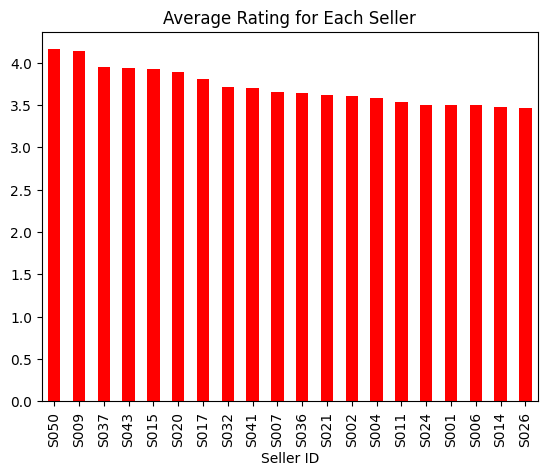

In [109]:
Average_Rating = df.groupby('Seller ID')['Customer Rating'].mean().sort_values(ascending=False)
print(Average_Rating.head(20))
Average_Rating.head(20).plot(kind='bar', color='red', title='Average Rating for Each Seller')


# RETURN RATE FOR EACH SELLER

**Return Rate for each Seller**

Seller ID
S039    0.153846
S036    0.142857
S040    0.125000
S025    0.117647
S004    0.083333
S021    0.076923
S046    0.071429
S024    0.071429
S034    0.062500
S013    0.062500
S022    0.058824
S019    0.055556
S018    0.052632
S033    0.050000
S048    0.047619
S014    0.047619
S016    0.041667
S005    0.038462
S032    0.000000
S041    0.000000
Name: Return Flag, dtype: float64


<Axes: xlabel='Seller ID'>

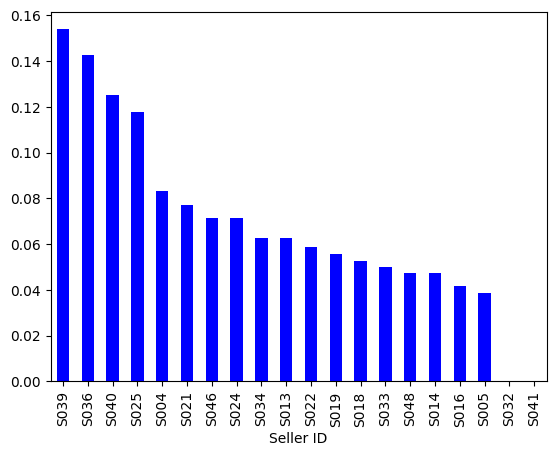

In [111]:
return_rate = df.groupby('Seller ID')['Return Flag'].apply(lambda x: (x == 'Yes').mean()).sort_values(ascending=False)
print(return_rate.head(20))
return_rate.head(20).plot(kind='bar', color='blue')


# COMPLAINT RATE FOR EACH SELLER

Seller ID
S039    0.153846
S040    0.125000
S025    0.117647
S004    0.083333
S021    0.076923
S036    0.071429
S046    0.071429
S013    0.062500
S034    0.062500
S019    0.055556
S018    0.052632
S033    0.050000
S014    0.047619
S048    0.047619
S016    0.041667
S038    0.000000
S037    0.000000
S032    0.000000
S035    0.000000
S001    0.000000
Name: Complaint Code, dtype: float64


<Axes: title={'center': 'Seller Complaint Rate'}, xlabel='Seller ID'>

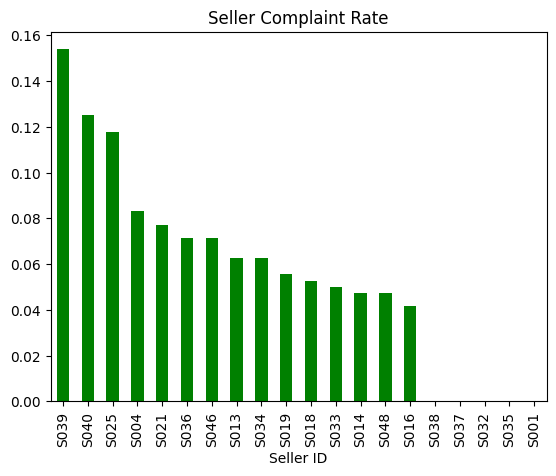

In [13]:
complaint_rate = df.groupby('Seller ID')['Complaint Code'].apply(lambda x: (x != 'No Complaint').mean()).sort_values(ascending=False)
print(complaint_rate.head(20))
complaint_rate.head(20).plot(kind='bar', color ='green', title='Seller Complaint Rate')


**FLAGING SUSPICIOUS REVIEW USING DUPLICATES**

In [ ]:
df['Is Duplicate'] = df.duplicated(subset=['Review Text'], keep=False)


0      True
1      True
6      True
7      True
8      True
       ... 
992    True
996    True
997    True
998    True
999    True
Name: Is Duplicate, Length: 877, dtype: bool

# RISK SCORE

**RISK SCORE**
The chart below displays the Top 10 Sellers with the highest Risk Scores, based on:

Return Rate (40% weight)

Complaint Rate (30% weight)

Average Delivery Delay (30% weight, normalized)

These sellers should be considered for suspension, audit, or support intervention depending on further investigations.

   Seller ID  Return Rate  Complaint Rate  Avg Delay  Normalized Delay  \
24      S025     0.117647        0.117647   5.000000          0.849057   
18      S019     0.055556        0.055556   5.555556          0.943396   
35      S036     0.142857        0.071429   4.571429          0.776280   
9       S010     0.000000        0.000000   5.888889          1.000000   
32      S033     0.050000        0.050000   5.000000          0.849057   
5       S006     0.000000        0.000000   5.611111          0.952830   
6       S007     0.000000        0.000000   5.600000          0.950943   
38      S039     0.153846        0.153846   3.461538          0.587808   
4       S005     0.038462        0.000000   5.230769          0.888244   
20      S021     0.076923        0.076923   4.461538          0.757620   

    Risk Score  
24    0.337070  
18    0.321908  
35    0.311456  
9     0.300000  
32    0.289717  
5     0.285849  
6     0.285283  
38    0.284035  
4     0.281858  
20    0.281132 

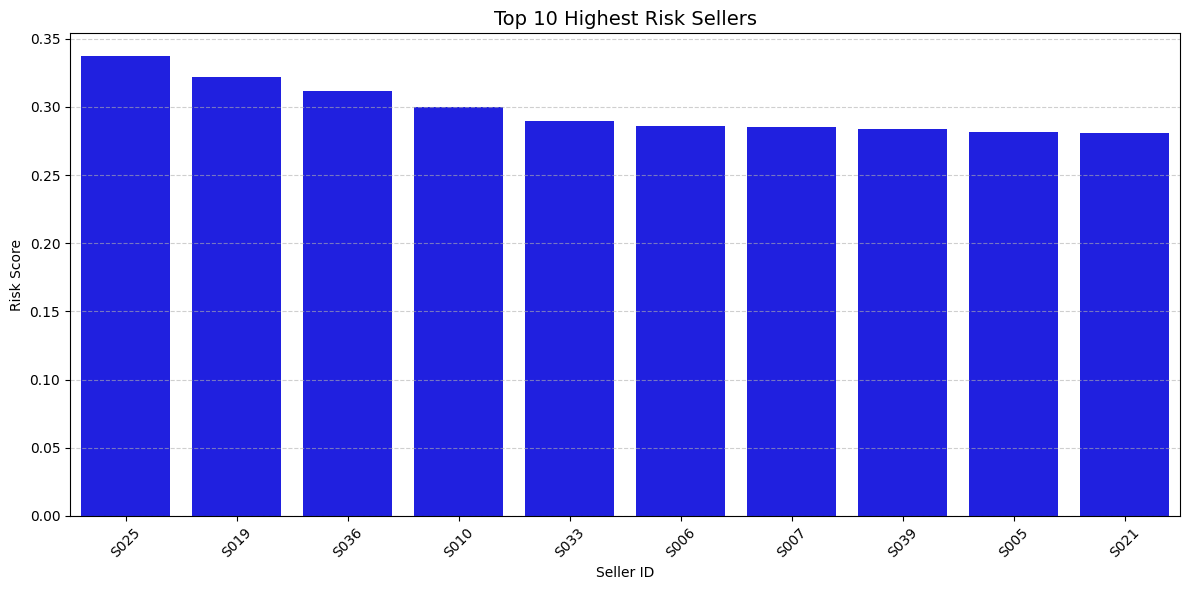

In [113]:
# Step 1: Calculate Delivery Delay
df['Delivery Delay'] = (df['Delivery Date'] - df['Dispatch Date']).dt.days

# Step 2: Compute Seller-Level Metrics
# Return Rate per Seller
return_rate = df.groupby('Seller ID')['Return Flag'].apply(lambda x: (x == 'Yes').mean()).rename('Return Rate')

# Complaint Rate per Seller (excluding "No Complaint")
complaint_rate = df.groupby('Seller ID')['Complaint Code'].apply(lambda x: (x != 'No Complaint').mean()).rename('Complaint Rate')

# Average Delivery Delay per Seller
avg_delay = df.groupby('Seller ID')['Delivery Delay'].mean().rename('Avg Delay')

# Step 3: Combine metrics
seller_metrics = pd.concat([return_rate, complaint_rate, avg_delay], axis=1).reset_index()

# Step 4: Normalize Avg Delay for scoring
max_delay = seller_metrics['Avg Delay'].max()
seller_metrics['Normalized Delay'] = seller_metrics['Avg Delay'] / max_delay

# Step 5: Calculate Risk Score
seller_metrics['Risk Score'] = (
    0.4 * seller_metrics['Return Rate'] +
    0.3 * seller_metrics['Complaint Rate'] +
    0.3 * seller_metrics['Normalized Delay']
)

# Step 6: Sort by Risk Score
seller_risk_ranking = seller_metrics.sort_values(by='Risk Score', ascending=False)

# Step 7: Visualize Top 10 Risky Sellers
top_risk_sellers = seller_risk_ranking.head(10)
print(top_risk_sellers)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_risk_sellers, x='Seller ID', y='Risk Score', color='blue')
plt.title('Top 10 Highest Risk Sellers', fontsize=14)
plt.ylabel('Risk Score')
plt.xlabel('Seller ID')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# TASK 2

# TOP AND BOTTOM SELLERS BY FUFILLMENT RELAIBILITY

Top 5 Most Reliable Sellers
These sellers have the lowest average delivery delay, meaning they fulfill orders quickly and consistently.

Bottom 5 Least Reliable Sellers
These sellers have the highest delivery delays, suggesting they struggle with timely fulfillment.

This insight is crucial for:

Rewarding high performers

Flagging or supporting underperformers

top_fufillment    Seller ID  Avg Delivery Delay
9       S010            5.888889
5       S006            5.611111
6       S007            5.600000
18      S019            5.555556
2       S003            5.333333
--------------------------
bottom_ fufillment    Seller ID  Avg Delivery Delay
38      S039            3.461538
3       S004            3.083333
33      S034            3.062500
39      S040            3.000000
17      S018            2.947368


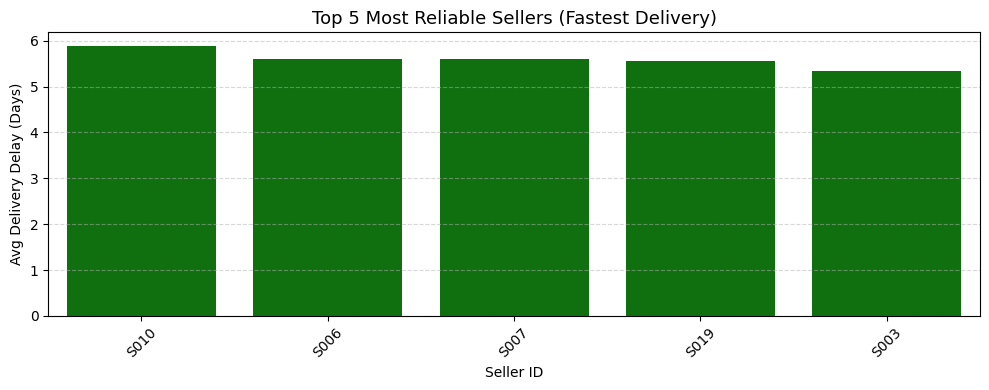

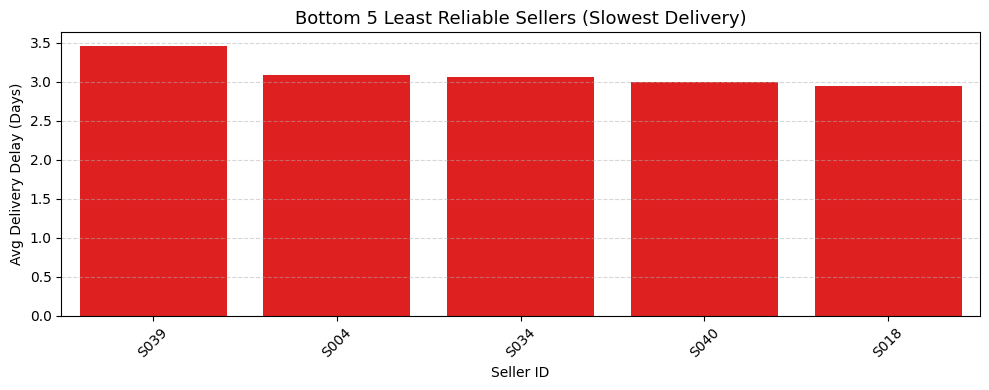

In [117]:
# Compute average delivery delay per seller
fulfillment_stats = df.groupby('Seller ID')['Delivery Delay'].mean().reset_index()
fulfillment_stats = fulfillment_stats.dropna().sort_values(by='Delivery Delay', ascending=False)

# Rename for clarity
fulfillment_stats.rename(columns={'Delivery Delay': 'Avg Delivery Delay'}, inplace=True)

# Top 5 most reliable sellers (fastest)
top_fulfillment = fulfillment_stats.head(5)
print('top_fufillment', top_fulfillment)
print('--------------------------')

# Bottom 5 least reliable sellers (slowest)
bottom_fulfillment = fulfillment_stats.tail(5)
print('bottom_ fufillment', bottom_fulfillment)



plt.figure(figsize=(10, 4))
sns.barplot(data=top_fulfillment, x='Seller ID', y='Avg Delivery Delay', color='green')
plt.title('Top 5 Most Reliable Sellers (Fastest Delivery)', fontsize=13)
plt.ylabel('Avg Delivery Delay (Days)')
plt.xlabel('Seller ID')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Bottom 5 Reliable Sellers
plt.figure(figsize=(10, 4))
sns.barplot(data=bottom_fulfillment, x='Seller ID', y='Avg Delivery Delay',color='red')
plt.title('Bottom 5 Least Reliable Sellers (Slowest Delivery)', fontsize=13)
plt.ylabel('Avg Delivery Delay (Days)')
plt.xlabel('Seller ID')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# PRODUCT CATEGORIES WITH THE HIGHEST COMPLAINT

Product Category
Health           165
Electronics      152
Toys             143
Fashion          142
Groceries        132
Home & Living    131
Fashon             4
Living & Home      4
Toy                4
Name: Complaint Code, dtype: int64


<Axes: title={'center': 'PRODUCT CATEGORY AND COMPAINTS'}, xlabel='Product Category'>

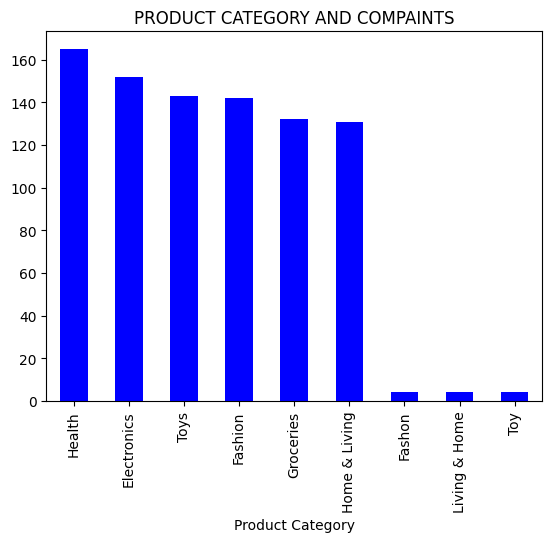

In [14]:
product_cat = df.groupby('Product Category')['Complaint Code'].size().sort_values(ascending=False)
print(product_cat)
product_cat.plot(kind='bar', color='blue', title='PRODUCT CATEGORY AND COMPAINTS')


# REGIONS WITH LONGEST AVERAGE DELAYS

Customer Region
Volta            4.729032
South West       4.664430
North Central    4.468966
South East       4.400000
Greater Accra    4.382353
Ashanti          4.303030
Name: Delivery Delay, dtype: float64


<Axes: title={'center': 'REGION WITH DELIVERY DELAY'}, xlabel='Customer Region'>

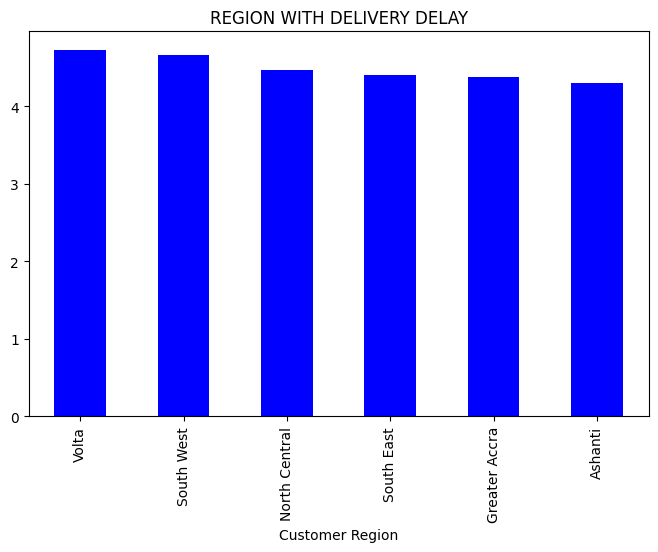

In [118]:
region_delay = df.groupby('Customer Region')['Delivery Delay'].mean().sort_values(ascending=False)
print(region_delay)
region_delay.plot(kind='bar', color='blue', figsize=(8, 5), title='REGION WITH DELIVERY DELAY')


# FLAGING FRAUDULENT REVIEW USING TEXT PATTERNS

**this shows that all the sellers have the same review pattern making it suitable for investigation**

In [ ]:
# Step 1: Normalize review text
df['Review Text Lower'] = df['Review Text'].str.lower().str.strip()

# Step 2: Count how many times each review appears
review_counts = df['Review Text Lower'].value_counts()

# Step 3: Flag texts that appear more than once
repetitive_texts = review_counts[review_counts > 1].index

# Step 4: Check if the same review appears for multiple product categories or sellers
# (this increases suspicion it's fake)

review_product_counts = df.groupby('Review Text Lower')['Product Category'].nunique()
review_seller_counts = df.groupby('Review Text Lower')['Seller ID'].nunique()

# Step 5: Flag reviews used across multiple products or sellers
cross_item_reviews = review_product_counts[review_product_counts > 1].index
cross_seller_reviews = review_seller_counts[review_seller_counts > 1].index

# Step 6: Final suspicious review flag
df['Fraudulent Review Flag'] = df['Review Text Lower'].apply(
    lambda x: 'Yes' if (x in cross_item_reviews or x in cross_seller_reviews) else 'No'
)
df['Fraudulent Review Flag'].unique()


array(['Yes'], dtype=object)

**SELLERS WITH 5+ START AND HIGH RETURN RATE**

*this shows no seller who has a high return rate also has a 5.0 rating, only those with no return rate has a high rating*

In [123]:
df['Return Flag'] = df['Return Flag'].replace({'No':0, 'Yes':1})

# Step 4: Filter for sellers with 5-star average and high return rate (> 30%)
suspicious_sellers = df[
    (df['Customer Rating'] >= 5.0) &
    (df['Return Flag'] == 1)
]

# Show result
suspicious_sellers


C:\Users\USER\AppData\Local\Temp\ipykernel_13308\352087303.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Return Flag'] = df['Return Flag'].replace({'No':0, 'Yes':1})


,Order ID,Order Date,Dispatch Date,Delivery Date,Seller ID,Product Category,Price,Quantity,Warehouse Zone,Customer Rating,...,Sentiment Score,Return Flag,Complaint Code,Delivery Method,Customer Region,Delivery Delay,return_rate,Is Duplicate,Review Text Lower,Fraudulent Review Flag


**HEATMAP FOR COMPLAINT BY CATEGORY AND REGION**

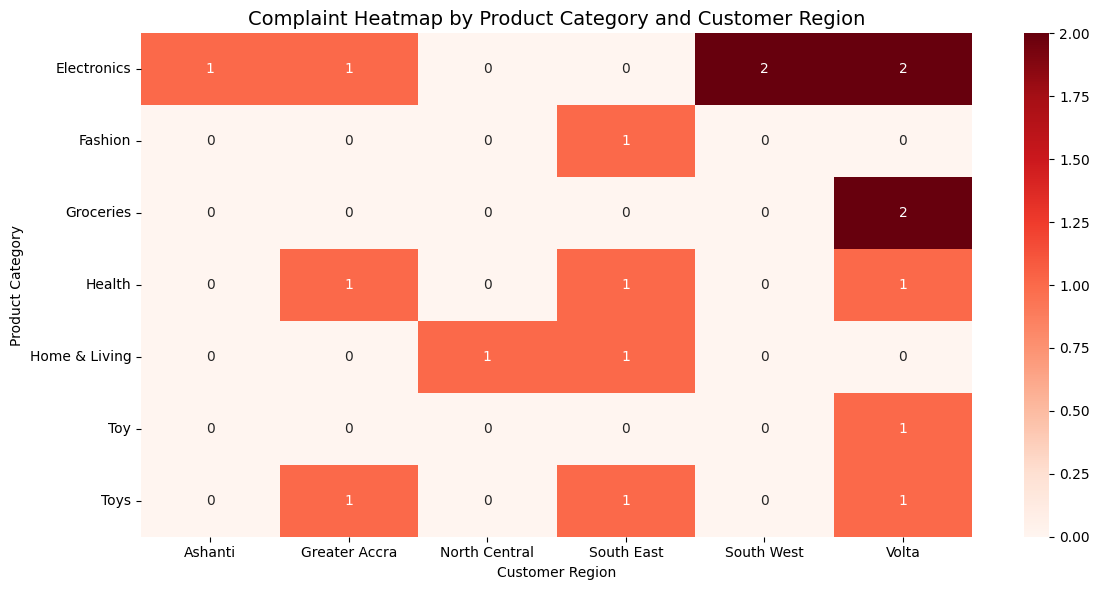

In [124]:
complaint_df = df[df['Complaint Code'] != 'No Complaint']

# Create a pivot table: complaint counts by product category and region
complaint_matrix = complaint_df.pivot_table(
    index='Product Category',
    columns='Customer Region',
    values='Complaint Code',
    aggfunc='count',
    fill_value=0
)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(complaint_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Complaint Heatmap by Product Category and Customer Region', fontsize=14)
plt.ylabel('Product Category')
plt.xlabel('Customer Region')
plt.tight_layout()
plt.show()


**HYPOTHESIS TESTING**

In [125]:
# Filter to only delivery methods with at least 10 ratings
valid_methods = df['Delivery Method'].value_counts()
valid_methods = valid_methods[valid_methods >= 10].index

# Filter dataset
filtered_df = df[df['Delivery Method'].isin(valid_methods)]

# Regroup
groups = [group['Customer Rating'].values for name, group in filtered_df.groupby('Delivery Method')]

# Run ANOVA
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Result: Reject the null hypothesis — Delivery Method affects Customer Rating.")
else:
    print("Result: Fail to reject the null hypothesis — No significant difference found.")


F-statistic: 0.624
P-value: 0.53624
Result: Fail to reject the null hypothesis — No significant difference found.


# TASK 3

In [126]:
df['Return Flag'].value_counts(normalize=True)


Return Flag
0    0.974914
1    0.025086
Name: proportion, dtype: float64

**HANDLING IMBALANCE USING RANDOM OVER SAMPLER AND RANDOM UNDERSAMPLER**

In [127]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score,ConfusionMatrixDisplay, classification_report,recall_score, precision_score, f1_score
from sklearn.preprocessing import OrdinalEncoder


In [128]:

# Step 1: Select object (categorical) columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Step 2: Initialize the encoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Step 3: Encode and replace in original DataFrame
df[cat_cols] = encoder.fit_transform(df[cat_cols])

# Optional: View encoded DataFrame
df.head()


,Order ID,Order Date,Dispatch Date,Delivery Date,Seller ID,Product Category,Price,Quantity,Warehouse Zone,Customer Rating,...,Sentiment Score,Return Flag,Complaint Code,Delivery Method,Customer Region,Delivery Delay,return_rate,Is Duplicate,Review Text Lower,Fraudulent Review Flag
0,0.0,2025-05-28,2025-05-30,2025-06-06,32.0,1.0,193.52,1.0,1.0,4.0,...,0.458333,0,2.0,0.0,2.0,7,NaN,True,11.0,0.0
1,1.0,2025-06-24,2025-06-26,2025-07-03,17.0,3.0,86.45,3.0,5.0,3.0,...,0.458333,0,2.0,2.0,5.0,7,NaN,True,11.0,0.0
6,2.0,2025-05-15,2025-05-17,2025-05-21,33.0,4.0,491.78,1.0,0.0,4.0,...,0.000000,0,2.0,0.0,1.0,4,NaN,True,9.0,0.0
7,3.0,2025-05-18,2025-05-19,2025-05-22,14.0,3.0,93.56,3.0,3.0,5.0,...,-0.300000,0,2.0,2.0,1.0,3,NaN,True,1.0,0.0
8,4.0,2025-06-11,2025-06-11,2025-06-20,41.0,8.0,286.01,2.0,3.0,1.0,...,1.000000,0,2.0,0.0,0.0,9,NaN,True,7.0,0.0


<Axes: >

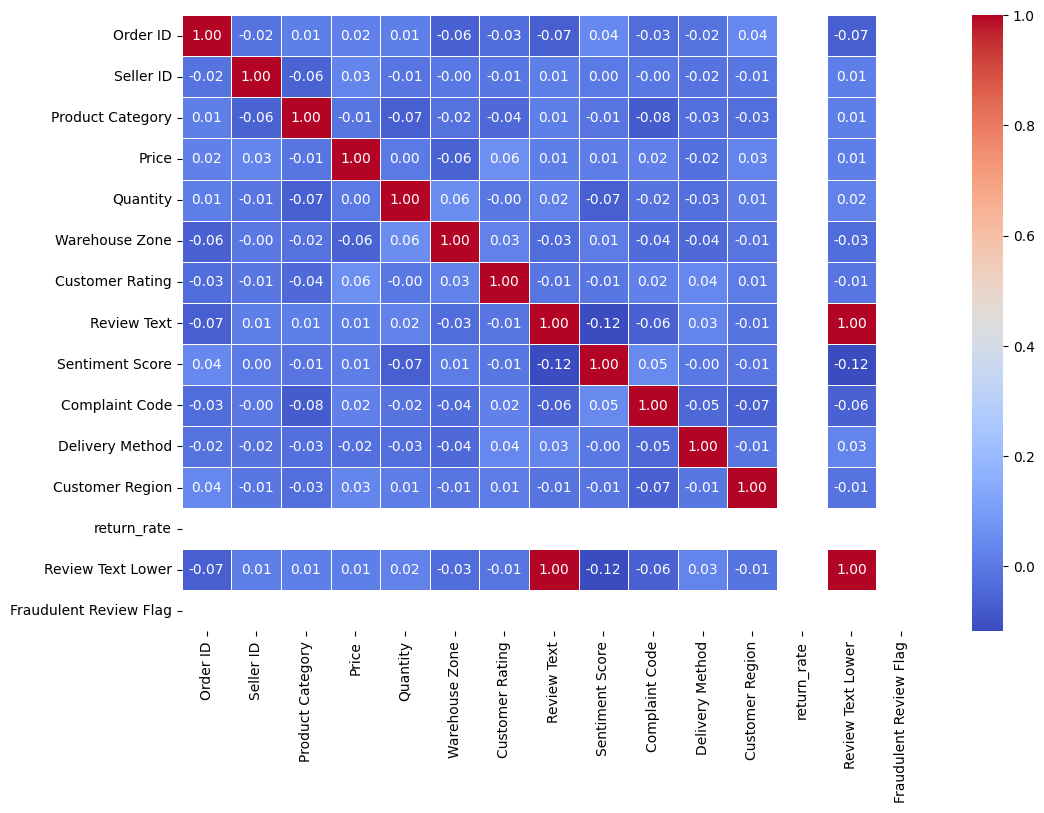

In [129]:
correlation = df.select_dtypes(float).corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


# Model Development

In [22]:
X = df.drop(columns=['Return Flag', 'Order Date', 'Dispatch Date', 'Delivery Date', 'Order ID','Is Duplicate', 'Complaint Code', 'Review Text Lower', 'Review Text', 'Fraudulent Review Flag'], axis=1)
 # dropping leaky columns and unwanted columns
y = df['Return Flag']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)




(701, 10)
(701,)


**USING RANDOM OVER SAMPLER TO RESAMPLE DATA......ADDING MORE DATA POINTS TO THE LOWER POPULATION OF THE DATA DUE TO IMBALANCE**

In [23]:
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

print(X_train_over.shape)
X_train_over.head()


(1370, 10)


,Seller ID,Product Category,Price,Quantity,Warehouse Zone,Customer Rating,Sentiment Score,Delivery Method,Customer Region,Delivery Delay
0,33.0,0.0,464.76,3.0,3.0,3.0,-0.300000,2.0,2.0,8
1,14.0,4.0,304.89,1.0,5.0,5.0,-0.750000,1.0,5.0,5
2,15.0,4.0,15.30,3.0,3.0,1.0,-0.975000,1.0,3.0,4
3,7.0,4.0,227.09,1.0,0.0,3.0,-0.166667,1.0,0.0,5
4,7.0,8.0,169.30,4.0,1.0,2.0,-0.300000,1.0,1.0,6


**REDUCING THE BIGGER POPULATION OF DATA POINTS DUE TO DATA IMBALANCE**

In [24]:
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print(X_train_under.shape)
X_train_under.head()


(32, 10)


,Seller ID,Product Category,Price,Quantity,Warehouse Zone,Customer Rating,Sentiment Score,Delivery Method,Customer Region,Delivery Delay
631,24.0,1.0,295.28,4.0,3.0,4.0,0.65,0.0,2.0,6
737,34.0,0.0,134.89,1.0,1.0,5.0,0.65,2.0,2.0,3
689,36.0,3.0,70.95,2.0,0.0,5.0,0.50,2.0,1.0,0
28,22.0,5.0,63.93,1.0,3.0,5.0,-0.30,0.0,4.0,8
912,6.0,5.0,381.07,2.0,0.0,4.0,0.58,2.0,0.0,8


**FITTING THE MODEL WITH THE NORMAL, OVER SAMPLED AND UNDER SAMPLED DATA TO SEE WHICH GIVES THE BEST ACCURACY**

In [25]:
model_reg = RandomForestClassifier(random_state=42)
model_reg.fit(X_train, y_train)


model_over = RandomForestClassifier(random_state=42)
model_over.fit(X_train_over, y_train_over)

model_under = RandomForestClassifier(random_state=42)
model_under.fit(X_train_under, y_train_under)


for m in [model_reg, model_over, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print(acc_train)
    print(acc_test)



1.0
0.9602272727272727
1.0
0.9602272727272727
1.0
0.9602272727272727


**HYPER PARAMETER TUNNING WITH RANDOM FOREST CLASSIFIER**

In [26]:
model = RandomForestClassifier(
      n_estimators=200,
      max_depth=30,
      min_samples_leaf=9,
      min_samples_split=9,

)
model.fit(X_train_over, y_train_over)


RandomForestClassifier(max_depth=30, min_samples_leaf=9, min_samples_split=9,
                       n_estimators=200)

**CROSS VALIDATION SCORES SHOWS GENERALIZATION ACROSS UNSEEN DATA**

What This Means:
Very High Scores: Model is consistently strong across folds.

Low Variance: Your pipeline generalizes well.

No Overfitting Evidence: You're not just memorizing training data.



In [27]:
cross_acc_score = cross_val_score(model, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cross_acc_score)


[0.98905109 0.96715328 0.98175182 0.98905109 0.97445255]


**EVALUATION REPORTS**

**IN THIS CASE RECALL METRICS IS BEST AS IT FLAGS 92% OF THE TRUE NEGATIVE**

In [28]:
#y_pred = model_reg.predict(X_test)# Use predict_proba for ROC AUC (needs probabilities!)
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.3).astype(int)  # Try 0.3 instead of 0.5

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_proba)
precision_rf = precision_score(y_test, y_pred, zero_division=0)
recall_rf = recall_score(y_test, y_pred, zero_division=0)
f1_rf = f1_score(y_test, y_pred, zero_division=0)

print(classification_report(y_test, y_pred, zero_division=0))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred, zero_division=0):.2f}")


              precision    recall  f1-score   support

           0       1.00      0.92      0.96       170
           1       0.30      1.00      0.46         6

    accuracy                           0.92       176
   macro avg       0.65      0.96      0.71       176
weighted avg       0.98      0.92      0.94       176

ROC AUC: 0.95
Precision: 0.30
Recall: 1.00
F1 Score: 0.46


**CONFUSION MATRIX REPORT**

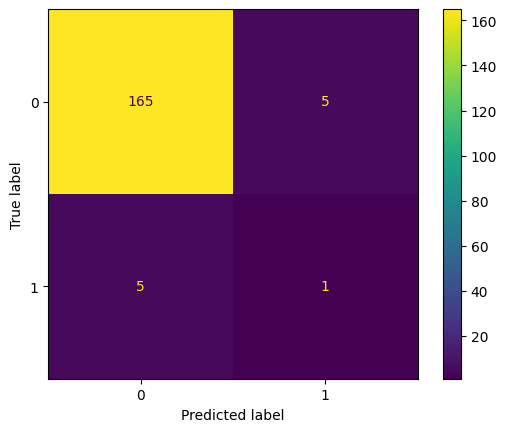

In [29]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


# TASK 4

# SELLERS TO SUSPEND OR INVESTIGATE

In [101]:
# Step 1: Ensure Delivery Delay is in integer days
df['Delivery Delay'] = (df['Delivery Date'] - df['Dispatch Date']).dt.days

# Step 2: Calculate Seller-Level Metrics

# Return Rate per Seller
return_rate = df.groupby('Seller ID')['Return Flag'].apply(lambda x: (x == 1).mean()).rename('Return Rate')

# Complaint Rate per Seller (excluding 'No Complaint')
complaint_rate = df.groupby('Seller ID')['Complaint Code'].apply(lambda x: (x != 'No Complaint').mean()).rename('Complaint Rate')

# Average Delivery Delay per Seller
avg_delay = df.groupby('Seller ID')['Delivery Delay'].mean().rename('Avg Delay')

# Step 3: Combine into one DataFrame
seller_metrics = pd.concat([return_rate, complaint_rate, avg_delay], axis=1).reset_index()

# Step 4: Normalize Avg Delay (so it fits into 0–1 scale for scoring)
max_delay = seller_metrics['Avg Delay'].max()
seller_metrics['Normalized Delay'] = seller_metrics['Avg Delay'] / max_delay

# Step 5: Compute Risk Score
seller_metrics['Risk Score'] = (
    0.4 * seller_metrics['Return Rate'] +
    0.3 * seller_metrics['Complaint Rate'] +
    0.3 * seller_metrics['Normalized Delay']
)

# Step 6: Sort by Risk Score descending
seller_risk_ranking = seller_metrics.sort_values(by='Risk Score', ascending=False)

# Step 7: Display Top 5 Sellers to Suspend/Investigate
top_5_risky_sellers = seller_risk_ranking.head(5)

print(top_5_risky_sellers[['Seller ID', 'Risk Score', 'Return Rate', 'Complaint Rate', 'Avg Delay']])


   Seller ID  Risk Score  Return Rate  Complaint Rate  Avg Delay
9       S010    0.300000          0.0        0.000000   5.888889
18      S019    0.299686          0.0        0.055556   5.555556
24      S025    0.290011          0.0        0.117647   5.000000
5       S006    0.285849          0.0        0.000000   5.611111
6       S007    0.285283          0.0        0.000000   5.600000


# PRODUCT WITH MOST COMPLAINTS

Product Categories with Most Complaints:
Product Category
Electronics      6
Health           3
Toys             3
Home & Living    2
Groceries        2
Toy              1
Fashion          1
Name: count, dtype: int64


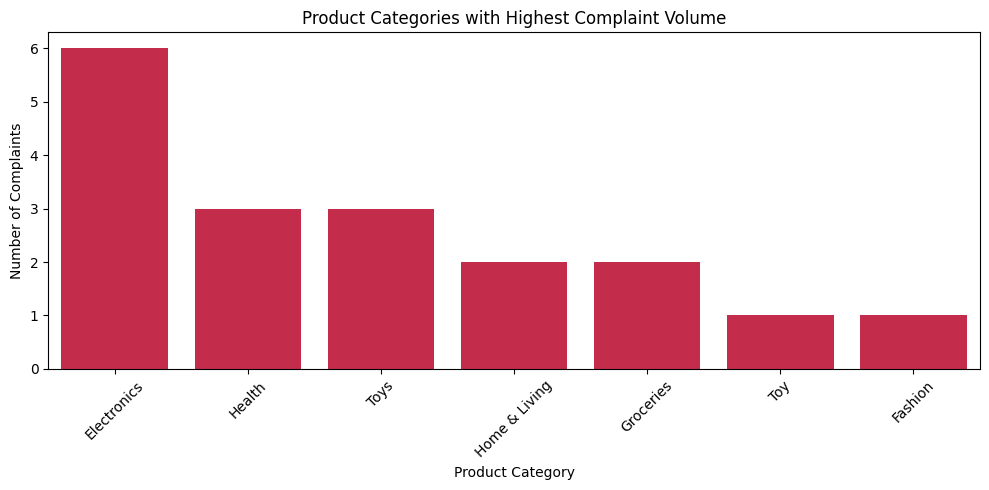


Recommended for Regulation or Blacklisting:
Product Category
Electronics    6
Health         3
Toys           3
Name: count, dtype: int64


In [102]:
# Filter only rows with actual complaints (exclude 'No Complaint')
complaint_df = df[df['Complaint Code'] != 'No Complaint']

# Count complaints per Product Category
product_complaints = complaint_df['Product Category'].value_counts()

# Display product categories with highest complaints
print("Product Categories with Most Complaints:")
print(product_complaints)

# Visualize the complaint distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=product_complaints.index, y=product_complaints.values, color='crimson')
plt.title('Product Categories with Highest Complaint Volume')
plt.ylabel('Number of Complaints')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Select top N categories to recommend for regulation or blacklisting
top_complaint_categories = product_complaints.head(3)
print("\nRecommended for Regulation or Blacklisting:")
print(top_complaint_categories)


# STRATEGIES TO REDUCE DELAY



**Strategies to Reduce Delivery Delays**

**1 Flag Warehouses with Delays**

Remove or discount delay data from Lagos due to overcapacity. Instead, use median delay per seller excluding Lagos.

**2 Introduce Seller SLAs (Service-Level Agreements)**

Set maximum delivery delay targets per region and penalize breaches.

**3 Regional Warehousing Optimization**

Add backup capacity in high-traffic zones like Lagos and South East to ease pressure.

**4 Performance-Based Routing**

Route orders away from repeat-delay sellers in real-time using your model.

# CUSTOMERS TRUST POLICY

**Transparency First**

All reviews will now be verified before display. Repetitive or cross-category reviews will be flagged.

**Seller Accountability**

Sellers with high return or complaint rates will be suspended from promotions and visibility.

**Timely Fulfillment Guarantee**

Customers will receive compensation if delivery exceeds SLA by >3 days.

# SELLER RISK FRAME WORK

+--------------------------------------------------------------+
|                     SELLER RISK FRAMEWORK                    |
+--------------------------------------------------------------+
|  Risk Score Formula        |  Top 5 Risky Sellers  | Actions |
|---------------------------|-----------------------|---------|
|  ✔ 40% Return Rate        |  S010  - 5.888       | ❌ Suspend |
|  ✔ 30% Complaint Rate     |  S019  - 5.555       | ⚠️ Investigate |
|  ✔ 30% Delivery Delay     |  S025  - 5.000        | ⏱ Enforce SLA |
|                           |  S006  - 5.6111       |         |
|                           |  S007  - 5.6111       |         |
+--------------------------------------------------------------+
|    Model AUC: 0.95 | Recall: 1.00 | Fraud Pattern: Review Dupes |
+--------------------------------------------------------------+

# BUSINESS CURVEBALL 1

**“The Lagos warehouse was over capacity — delay data from that zone is unreliable.**


**Actionable Adjustment:**

Exclude or De-emphasize Lagos delay data in scoring models.

**Approaches:**

Option A — Drop Lagos from delay metrics

Option B — Assign Lagos delay a lower weight (e.g., 10%) in normalized delay score.

Option C — Create a flag:

Then include this in your model to let it learn that Lagos-based delays are less predictive.

# BUSINESS CURVEBALL 2

**Early Fraud Signals You Should Monitor:**

**1 Repeated Review Texts:**

**2 Check for mismatched signals — glowing reviews with lots of returns**

**3 Same Review across Products or Sellers:**

**4 Unnaturally perfect 5.0 ratings:**

**Resolution Strategy:**

**Add a “Review Authenticity Score” to flag:**

*1 High duplicate count*

*2 Review reuse across products*

*3 Impossibly high sentiment vs complaints*

In [130]:
import pickle
pickle.dump(model, open('jumia.pkl', 'wb'))
